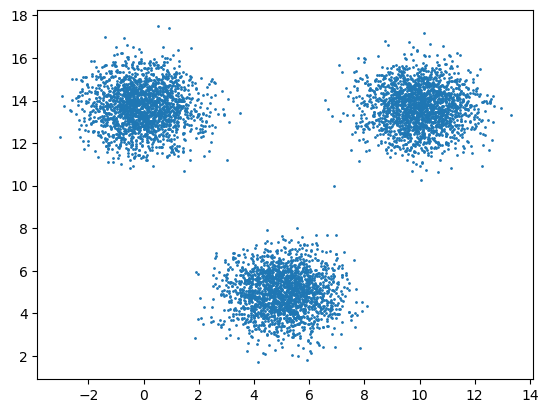

In [25]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../../')
import numpy as np
np.random.seed(43)
import matplotlib.pyplot as plt
from models import rbm

def data():
    from math import sqrt
    cov = np.eye(2)
    samples_per_center = 2000
    n = lambda m: np.random.multivariate_normal(m, cov, samples_per_center)
    mean1 = (5, 5)
    mean2 = (10, 5+5*sqrt(3))
    mean3 = (0, 5+5*sqrt(3))
    X =  np.vstack((n(mean1), n(mean2), n(mean3)))
    np.random.shuffle(X)
    return X

X = data()
img = plt.scatter(x=X[:, 0], y=X[:, 1], s=1)

In [26]:
model = rbm.RBM(
    n_vis=2,
    n_hid=12
)
stats = model.fit_autograd(
    X = X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=200,
    batch_size=100,
    gamma=0.1,
    gamma_delay=100,
    rng_seed=0,
    verbose_interval=5,
    checkpoint_path=f'{directory_path}/presentation_visualizations/presentation_vid_checkpoints/presentation.pth'
)

epoch: 000 of 200 | loss: 0.174 | recon_mse: 30.09 | kl_data_model: 7.999 | kl_model_data: 3.235
epoch: 005 of 200 | loss: 0.025 | recon_mse: 7.919 | kl_data_model: 2.972 | kl_model_data: 4.345
epoch: 010 of 200 | loss: 0.005 | recon_mse: 5.271 | kl_data_model: 2.395 | kl_model_data: 3.644
epoch: 015 of 200 | loss: -0.006 | recon_mse: 2.423 | kl_data_model: 1.927 | kl_model_data: 3.045
epoch: 020 of 200 | loss: -0.007 | recon_mse: 1.343 | kl_data_model: 1.521 | kl_model_data: 2.322
epoch: 025 of 200 | loss: -0.01 | recon_mse: 1.096 | kl_data_model: 1.54 | kl_model_data: 1.965
epoch: 030 of 200 | loss: -0.006 | recon_mse: 0.965 | kl_data_model: 1.331 | kl_model_data: 1.791
epoch: 035 of 200 | loss: -0.001 | recon_mse: 0.825 | kl_data_model: 0.956 | kl_model_data: 1.388
epoch: 040 of 200 | loss: -0.007 | recon_mse: 0.818 | kl_data_model: 0.944 | kl_model_data: 1.317
epoch: 045 of 200 | loss: -0.012 | recon_mse: 0.737 | kl_data_model: 0.532 | kl_model_data: 0.672
epoch: 050 of 200 | loss:

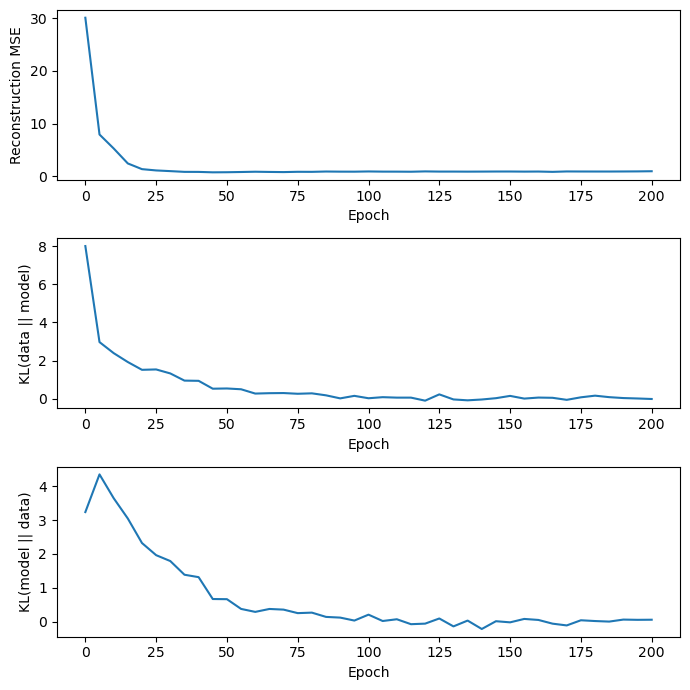

In [28]:
def visualize_learning(stats):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
    axs[0].plot(stats['epoch_num'], stats['recon_mse'])
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Reconstruction MSE')
    axs[1].plot(stats['epoch_num'], stats['kl_data_model'])
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('KL(data || model)')
    axs[2].plot(stats['epoch_num'], stats['kl_model_data'])
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('KL(model || data)')
    plt.tight_layout()
visualize_learning(stats)


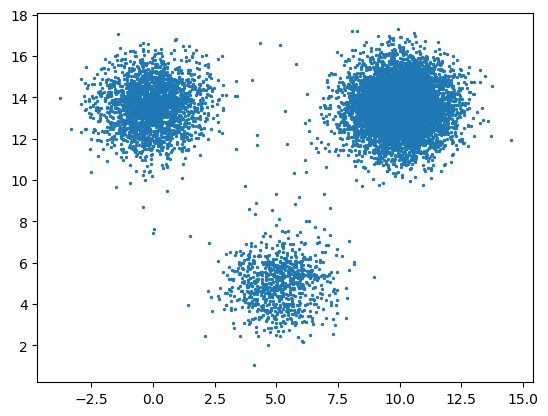

In [29]:
model = rbm.load(f'{directory_path}/presentation_visualizations/presentation_vid_checkpoints/presentation.pth')
samples = model.reconstruct(np.zeros((10000, 2)), n_gibbs=500)
plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)

# Generate pngs

KeyboardInterrupt: 

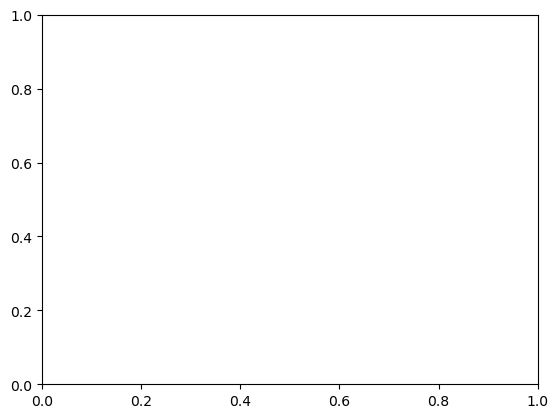

In [30]:
current_axis = plt.gca()
for i in range(200):
    model = rbm.load(f'{directory_path}/presentation_visualizations/presentation_vid_checkpoints/presentation-{i}.pth')
    samples = model.reconstruct(np.zeros((6000, 2)), n_gibbs=500)
    current_axis.scatter(x=samples[:, 0], y=samples[:, 1], s=1)
    current_axis.set_xlim(-5, 15)
    current_axis.set_ylim(0, 20)
    plt.savefig(f'{directory_path}/presentation_visualizations/presentation_vid_imgs/pic-{i}.png')
    current_axis.clear()
None

# Turn png's into video

In [24]:
import cv2
import os

# Directory containing PNG images
input_directory = f'{directory_path}/presentation_visualizations/presentation_vid_imgs'

# Output video file
output_video = f'{directory_path}/presentation_visualizations/output_video.mp4'

# Frame rate (adjust as needed)
frame_rate = 24

# Function to sort files numerically
def sort_files_numerically(files):
    return sorted(files, key=lambda x: int(x.split('.')[0].split('-')[1]))

# Get the list of PNG files in the directory
png_files = [f for f in os.listdir(input_directory) if f.endswith('.png')]
png_files = sort_files_numerically(png_files)

# Read the first image to get dimensions
first_image = cv2.imread(os.path.join(input_directory, png_files[0]))
height, width, layers = first_image.shape

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec
video = cv2.VideoWriter(output_video, fourcc, frame_rate, (width, height))

# Write each frame to the video
for png_file in png_files:
    image_path = os.path.join(input_directory, png_file)
    frame = cv2.imread(image_path)
    video.write(frame)

# Release the VideoWriter object
video.release()

print(f"Video created: {output_video}")

Video created: /Users/andrewyang/Desktop/adversarialRBMs/demos/rbm_demos/presentation_visualizations/output_video.mp4


# Model visualize

In [11]:
import skimage
rgb2lab = lambda x: skimage.color.rgb2lab([[x]])[0,0,:]
lab2rgb = lambda x: skimage.color.lab2rgb([[x]])[0,0,:]

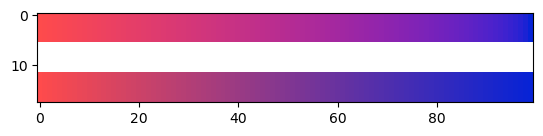

In [43]:
import numpy as np
import matplotlib.pyplot as plt

r = 0x07
g = 0x23
b = 0xD6
blue = np.array([r, g, b], dtype=np.uint8).astype(np.float64)/255
r = 0xFF
g = 0x4B
b = 0x4C
red = np.array([r, g, b], dtype=np.uint8).astype(np.float64)/255

def interp(r, b, t):
    return lab2rgb(t*rgb2lab(b) + (1-t)*rgb2lab(r))


In [ ]:
pre = r"""\documentclass[tikz,border=2mm]{standalone}
\usepackage{tikz}

\begin{document}
\begin{tikzpicture}[
	node distance=3.5cm,
]"""

post = r"""\foreach \x in {1,...,\nfirstrow}{
\pgfmathparse{\firstrow[\x-1]};
\definecolor{currentColor}{rgb}{\pgfmathresult};
\node[draw, circle, font=\footnotesize,color=currentColor] (nodex\x) at (0, -\x) {$v_{\x}$};
}

% Second Row
\foreach \y in {1,...,\nsecondrow}{
\pgfmathparse{\secondrow[\y-1]};
\definecolor{currentColor}{rgb}{\pgfmathresult};
\node[draw, circle, font=\footnotesize, color=currentColor] (nodey\y) at (1.5, \the\numexpr1-\y) {$h_{\y}$};
}

\foreach \x in {1,...,\nfirstrow}
\foreach \y in {1,...,\nsecondrow}{
\pgfmathparse{\thirdrow[(\x-1)*\nfirstrow + (\y-1)]};
\definecolor{currentColor}{rgb}{\pgfmathresult};
\draw[color=currentColor] (nodex\x) -- (nodey\y) node[midway] {};
}

\end{tikzpicture}
\end{document}"""

def color2str(c):
	# rgb -> "0.00 0.00 0.50"
	r2 = lambda x: round(x, 2)
	return f"{r2(c[0])} {r2(c[1])} {r2(c[2])}"

def first_row(l, n):
	s = "\\def\\firstrow{{"
	sep = ""
	for weight in l:
		low = -10
		high = 10
		clamp = max(min(weight, high), low)
		t = (clamp - low)/(high - low)
		color = interp(red, blue, t)
		s += sep
		sep = ", "
		s += f"{color2str(color)}"
	s += "}}\n"
	s += "\\def\\nfirstrow{" + n + "}\n"

def second_row(l, n):
	s = "\\def\\secondrow{{"
	for weight in l:
		low = -10
		high = 10
		clamp = max(min(weight, high), low)
		t = (clamp - low)/(high - low)
		color = interp(red, blue, t)
		s += sep
		sep = ", "
		s += f"{color2str(color)}"
	s += "}}\n"
	s += "\\def\\nsecondrow{" + n + "}\n"

def thrid_row(l):
	s = "\\def\\thirdrow{{"
	for weight in l:
		low = -10
		high = 10
		clamp = max(min(weight, high), low)
		t = (clamp - low)/(high - low)
		color = interp(red, blue, t)
		s += sep
		sep = ", "
		s += f"{color2str(color)}"
	s += "}}\n"

In [ ]:
for i in range(200):
    model = rbm.load(f'{directory_path}/presentation_visualizations/presentation_vid_checkpoints/presentation-{i}.pth')
    samples = model.reconstruct(np.zeros((6000, 2)), n_gibbs=500)
    current_axis.scatter(x=samples[:, 0], y=samples[:, 1], s=1)
    current_axis.set_xlim(-5, 15)
    current_axis.set_ylim(0, 20)
    plt.savefig(f'{directory_path}/presentation_visualizations/presentation_vid_imgs/pic-{i}.png')
